In [155]:
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep
from matplotlib import colors

from boostedhh import utils, hh_vars

In [156]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
MAIN_DIR = Path("../../../")

plot_dir = MAIN_DIR / "plots/TriggerStudy/25Mar7"
plot_dir.mkdir(parents=True, exist_ok=True)

samples_tag = "25Mar7Signal_v12_private_signal"

year = "2023"

In [158]:
df = pd.read_parquet(
    f"/ceph/cms/store/user/lumori/bbtautau/skimmer/{samples_tag}/{year}/GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_powheg-pythia8/parquet/"
)

In [159]:
cf = utils.get_cutflow(
    f"/ceph/cms/store/user/lumori/bbtautau/skimmer/{samples_tag}/{year}/GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_powheg-pythia8/pickles",
    year,
    "GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_powheg-pythia8",
)

In [160]:
print(len(df))  # 321569 in 2023 and 161477 in BPix

321569


In [161]:
list(df.columns)

[('GenHiggsEta', 0),
 ('GenHiggsEta', 1),
 ('GenHiggsPhi', 0),
 ('GenHiggsPhi', 1),
 ('GenHiggsMass', 0),
 ('GenHiggsMass', 1),
 ('GenHiggsPt', 0),
 ('GenHiggsPt', 1),
 ('GenHiggsChildren', 0),
 ('GenHiggsChildren', 1),
 ('GenbbEta', 0),
 ('GenbbEta', 1),
 ('GenbbPhi', 0),
 ('GenbbPhi', 1),
 ('GenbbMass', 0),
 ('GenbbMass', 1),
 ('GenbbPt', 0),
 ('GenbbPt', 1),
 ('GenTauEta', 0),
 ('GenTauEta', 1),
 ('GenTauPhi', 0),
 ('GenTauPhi', 1),
 ('GenTauMass', 0),
 ('GenTauMass', 1),
 ('GenTauPt', 0),
 ('GenTauPt', 1),
 ('GenTauhh', 0),
 ('GenTauhmu', 0),
 ('GenTauhe', 0),
 ('run', 0),
 ('event', 0),
 ('luminosityBlock', 0),
 ('MET_pt', 0),
 ('ht', 0),
 ('nJets', 0),
 ('nFatJets', 0),
 ('nPU', 0),
 ('nPV', 0),
 ('HLT_AK8PFJet220_SoftDropMass40_PNetBB0p35_DoubleAK4PFJet60_30_PNet2BTagMean0p50',
  0),
 ('HLT_AK8PFJet220_SoftDropMass40_PNetBB0p06_DoubleAK4PFJet60_30_PNet2BTagMean0p50',
  0),
 ('HLT_AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35', 0),
 ('HLT_AK8PFJet230_SoftDropMass40_PFAK8Parti

In [162]:
cf["ak8_pt"] / cf["all"]

0.11110748

In [163]:
np.mean((df["ak8FatJetPt"][1] > 250))  # efficiency of ak8 cut

0.19267404507275265

In [164]:
# efficiency of ak8 cut on gen tauhh events
np.sum((df["ak8FatJetPt"][1] > 250) * df["GenTauhh"][0]) / np.sum(df["GenTauhh"][0])

0.2310874920504967

In [165]:
np.sum((df["ak8FatJetPt"][1] > 230) * (df["ak8FatJetPt"][0] > 250)) / np.sum(
    (df["ak8FatJetPt"][0] > 250)
)

0.32489903935644165

In [166]:
print(cf["ak8_pt"])

8774.594


In [167]:
for cat in ["GenTauhh", "GenTauhmu", "GenTauhe"]:
    print(
        np.sum((df["ak8FatJetPt"][0] > 250) * df[cat][0])
        / np.sum(df[cat][0])
        * (cf["ak8_pt"] / cf["all"])
    )

0.08538645153159773
0.08517949510242036
0.08538822974990981


In [168]:
for cat in ["GenTauhh", "GenTauhmu", "GenTauhe"]:
    print(
        np.sum((df["ak8FatJetPt"][1] > 200) * (df["ak8FatJetPt"][0] > 250) * df[cat][0])
        / np.sum((df[cat][0]) * (df["ak8FatJetPt"][0] > 250))
    )

0.5180154472472701
0.4205536100141569
0.42056966011119706


In [169]:
xsecbr = 34.13 * 0.07 * 0.88
p250eff = 0.086 * (((0.3 * 0.42) + 2 * (0.23 * 0.23)) / 0.88)
trigeff = 0.94
print(p250eff)
print(xsecbr * p250eff * trigeff)

0.02265318181818182
0.04476865683920001


In [170]:
p230eff = 0.086 * (((0.38 * 0.42) + 2 * (0.23 * 0.3)) / 0.88)
trigeff = 0.92
print(p230eff)
print(xsecbr * p230eff * trigeff)

0.029083636363636357
0.056254016179200006


In [171]:
p200eff = 0.086 * (((0.38 * 0.516) + 2 * (0.23 * 0.41)) / 0.88)
trigeff = 0.89
print(p200eff)
print(xsecbr * p200eff * trigeff)

0.03759372727272727
0.07034324414152002


In [172]:
weights = df["weight"][0]
higgs = utils.make_vector(df, name="GenHiggs")
mhh = (higgs[:, 0] + higgs[:, 1]).mass
hbbpt = higgs[df["GenHiggsChildren"] == 5].pt
httpt = higgs[df["GenHiggsChildren"] == 15].pt

In [173]:
# bb_mask = df["GenHiggsDecayMode"] == 1

In [174]:
print(df.keys())
# sum(df["HLT_AK8PFJet230_SoftDropMass40_PNetBB0p06"][0])

MultiIndex([(                  'GenHiggsEta', 0),
            (                  'GenHiggsEta', 1),
            (                  'GenHiggsPhi', 0),
            (                  'GenHiggsPhi', 1),
            (                 'GenHiggsMass', 0),
            (                 'GenHiggsMass', 1),
            (                   'GenHiggsPt', 0),
            (                   'GenHiggsPt', 1),
            (             'GenHiggsChildren', 0),
            (             'GenHiggsChildren', 1),
            ...
            (        'ak4JetMatchedGenJetPt', 0),
            (        'ak4JetMatchedGenJetPt', 1),
            (        'ak4JetMatchedGenJetPt', 2),
            (        'ak4JetMatchedGenJetPt', 3),
            (                       'weight', 0),
            (      'single_weight_genweight', 0),
            (         'single_weight_pileup', 0),
            ('single_weight_ISRPartonShower', 0),
            ('single_weight_FSRPartonShower', 0),
            (                'weig

In [175]:
pnetbb = df["HLT_PFHT280_QuadPFJet30_PNet2BTagMean0p55"][
    0
]  # | df["HLT_AK8PFJet230_SoftDropMass40_PNetBB0p06"][0])

## Triggers

In [176]:
# Tau triggers Run 3 https://twiki.cern.ch/twiki/bin/view/CMSPublic/Run3TauHLT

pnetbb = df["HLT_AK8PFJet230_SoftDropMass40_PNetBB0p06"][
    0
]  # df["HLT_AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35"][0] is absent
pnettt = df["HLT_AK8PFJet230_SoftDropMass40_PNetTauTau0p03"][
    0
]  # df["HLT_AK8PFJet230_SoftDropMass40_PFAK8ParticleNetTauTau0p30"][0] is absent
pnet = pnetbb | pnettt

pfjet_legacy = df["HLT_AK8PFJet425_SoftDropMass40"][0]
pfjet_lowmass = df["HLT_AK8PFJet420_MassSD30"][0]
# pfjet_lowpt = df["HLT_AK8PFJet230_SoftDropMass40"][0] #HlT prescale 30
pfjet = pfjet_legacy | pfjet_lowmass

pnetbb_lowpt = df[
    "HLT_AK8PFJet220_SoftDropMass40_PNetBB0p06_DoubleAK4PFJet60_30_PNet2BTagMean0p50"
][0]

pk_quadjet_loose = df["HLT_PFHT280_QuadPFJet30_PNet2BTagMean0p55"][0]
pk_quadjet = df["HLT_PFHT340_QuadPFJet70_50_40_40_PNet2BTagMean0p70"][0]

quadjet = (
    df["HLT_QuadPFJet103_88_75_15_PFBTagDeepJet_1p3_VBF2"][0]
    | df["HLT_QuadPFJet103_88_75_15_DoublePFBTagDeepJet_1p3_7p7_VBF1"][0]
)

singletau = df["HLT_LooseDeepTauPFTauHPS180_L2NN_eta2p1"][0]

singlemuon = df["HLT_IsoMu24"][0] | df["HLT_Mu50"][0]

ditau = (
    df["HLT_DoubleMediumDeepTauPFTauHPS35_L2NN_eta2p1"][0]
    | df["HLT_DoubleMediumDeepTauPFTauHPS30_L2NN_eta2p1_PFJet60"][0]
    | df["HLT_DoubleMediumDeepTauPFTauHPS30_L2NN_eta2p1_PFJet75"][0]
)

mutau = (
    df["HLT_IsoMu20_eta2p1_LooseDeepTauPFTauHPS27_eta2p1_CrossL1"][0]
    | df["HLT_IsoMu24_eta2p1_LooseDeepTauPFTauHPS180_eta2p1"][0]
    | df["HLT_IsoMu24_eta2p1_LooseDeepTauPFTauHPS30_eta2p1_CrossL1"][0]
    | df["HLT_IsoMu24_eta2p1_MediumDeepTauPFTauHPS35_L2NN_eta2p1_CrossL1"][0]
    | df["HLT_IsoMu24_eta2p1_MediumDeepTauPFTauHPS30_L2NN_eta2p1_CrossL1"][0]
    | df["HLT_IsoMu24_eta2p1_MediumDeepTauPFTauHPS45_L2NN_eta2p1_CrossL1"][0]
)

egamma = (
    df["HLT_Ele30_WPTight_Gsf"][0]
    | df["HLT_Ele115_CaloIdVT_GsfTrkIdT"][0]
    | df["HLT_Ele50_CaloIdVT_GsfTrkIdT_PFJet165"][0]
    | df["HLT_Photon200"][0]
)

etau = df["HLT_Ele24_eta2p1_WPTight_Gsf_LooseDeepTauPFTauHPS30_eta2p1_CrossL1"][0]

triggers_dict = {
    "tauhh": {
        "mask": df["GenTauhh"][0],
        "label": r"$\tau_h\tau_h$",
        "triggers": {
            "All": pnet | pnetbb_lowpt | pfjet | quadjet | singletau | ditau | pk_quadjet_loose,
            "PNet": pnet,
            "PNet | Parking ": pnet | pk_quadjet_loose,
            "Parking Quad-jet": pk_quadjet_loose,
            "PNet | SingleTau | Di-tau": pnet | singletau | ditau,
            "PNet | PFJet | Quad-jet | SingleTau": pnet | pfjet | quadjet | singletau,
            "PNet | PFJet | Quad-jet | Di-tau": pnet | pfjet | quadjet | ditau,
            "PNet | PFJet | SingleTau | Di-tau": pnet | pfjet | singletau | ditau,
            "PNetBB": pnetbb,
            "PNetBB (low pt)": pnetbb_lowpt,
            "PNetTauTau": pnettt,
            "PFJet": pfjet,
        },
    },
    "tauhh_minus": {
        "mask": df["GenTauhh"][0],
        "label": r"$\tau_h\tau_h$",
        "triggers": {
            "All": pnet | pfjet | quadjet | singletau | pk_quadjet_loose | ditau,
            "-PNetBB": pnettt | pfjet | quadjet | singletau | ditau | pk_quadjet_loose,
            "-PNetTauTau": pnetbb | pfjet | quadjet | singletau | ditau | pk_quadjet_loose,
            "-PFJet": pnet | quadjet | singletau | ditau | pk_quadjet_loose,
            "-Quad-jet": pnet | pfjet | singletau | ditau | pk_quadjet_loose,
            "-SingleTau": pnet | pfjet | quadjet | ditau | pk_quadjet_loose,
            "-Di-tau": pnet | pfjet | quadjet | singletau | pk_quadjet_loose,
            "-Parking Quad-jet": pnet | pfjet | quadjet | singletau | ditau,
        },
    },
    "tauhmu": {
        "mask": df["GenTauhmu"][0],
        "label": r"$\tau_h\mu$",
        "triggers": {
            "All": pnet | pnetbb_lowpt | singlemuon | mutau | singletau | ditau | pfjet,
            "PNetBB": pnetbb,
            "PNetBB (low pt)": pnetbb_lowpt,
            "PNetTauTau": pnettt,
            "PFJet": pfjet,
            # "PFJet230" : pfjet_lowpt,
            # "PFJetSD30" : pfjet_lowmass,
            "PNetBB | TauTau": pnet,
            "Muon": singlemuon,
            "Mu-tau": mutau,
            "SingleTau": singletau,
            "Di-tau": ditau,
            # "Mu-tau | SingleTau | Di-tau": mutau | singletau | ditau,
            # "Muon | Mu-tau": singlemuon | mutau,
            # "PNetBB | TauTau | Muon": pnet | singlemuon,
        },
    },
    "tauhmu_minus": {
        "mask": df["GenTauhmu"][0],
        "label": r"$\tau_h\mu$",
        "triggers": {
            "All": pnet | singlemuon | mutau | singletau | ditau | pfjet,
            "-PNetBB": pnettt | singlemuon | mutau | singletau | ditau | pfjet,
            "-PNetTauTau": pnetbb | singlemuon | mutau | singletau | ditau | pfjet,
            "-Muon": pnet | mutau | singletau | ditau | pfjet,
            "-Mu-tau": pnet | singlemuon | singletau | ditau | pfjet,
            "-SingleTau": pnet | singlemuon | mutau | ditau | pfjet,
            "-Di-tau": pnet | singlemuon | mutau | singletau | pfjet,
            "-PFJet": pnet | singlemuon | mutau | singletau | ditau,
        },
    },
    "tauhe": {
        "mask": df["GenTauhe"][0],
        "label": r"$\tau_he$",
        "triggers": {
            "All": pnet | pnetbb_lowpt | egamma | etau | singletau | ditau | pfjet,
            "PNetBB": pnetbb,
            "PNetBB (low pt)": pnetbb_lowpt,
            "PNetTauTau": pnettt,
            "PFJet": pfjet,
            # "PFJet425" : pfjet,
            # "PFJet230" : pfjet_lowpt,
            # "PFJetSD30" : pfjet_lowmass,
            "PNetBB | TauTau": pnet,
            "EGamma": egamma,
            "e-tau": etau,
            "SingleTau": singletau,
            "Di-tau": ditau,
        },
    },
    "tauhe_minus": {
        "mask": df["GenTauhe"][0],
        "label": r"$\tau_he$",
        "triggers": {
            "All": pnet | egamma | etau | singletau | ditau | pfjet,
            "-PNetBB": pnettt | egamma | etau | singletau | ditau | pfjet,
            "-PNetTauTau": pnetbb | egamma | etau | singletau | ditau | pfjet,
            "-EGamma": pnet | etau | singletau | ditau | pfjet,
            "-e-tau": pnet | egamma | singletau | ditau | pfjet,
            "-SingleTau": pnet | egamma | etau | ditau | pfjet,
            "-Di-tau": pnet | egamma | etau | singletau | pfjet,
            "-PFJet": pnet | egamma | etau | singletau | ditau,
        },
    },
}

In [177]:
print(np.sum(pk_quadjet_loose))
print(np.sum(pk_quadjet))
print(np.sum(pk_quadjet_loose & ~pk_quadjet))
print(np.sum(quadjet & ~pk_quadjet_loose))

148211
79489
68722
6865


19


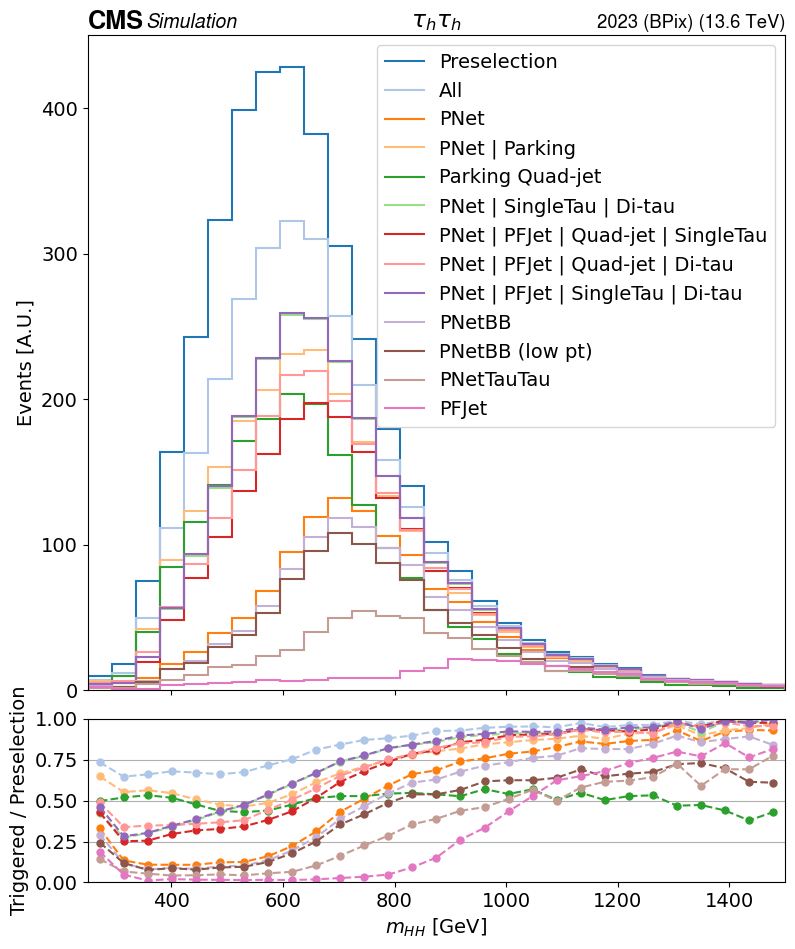

19


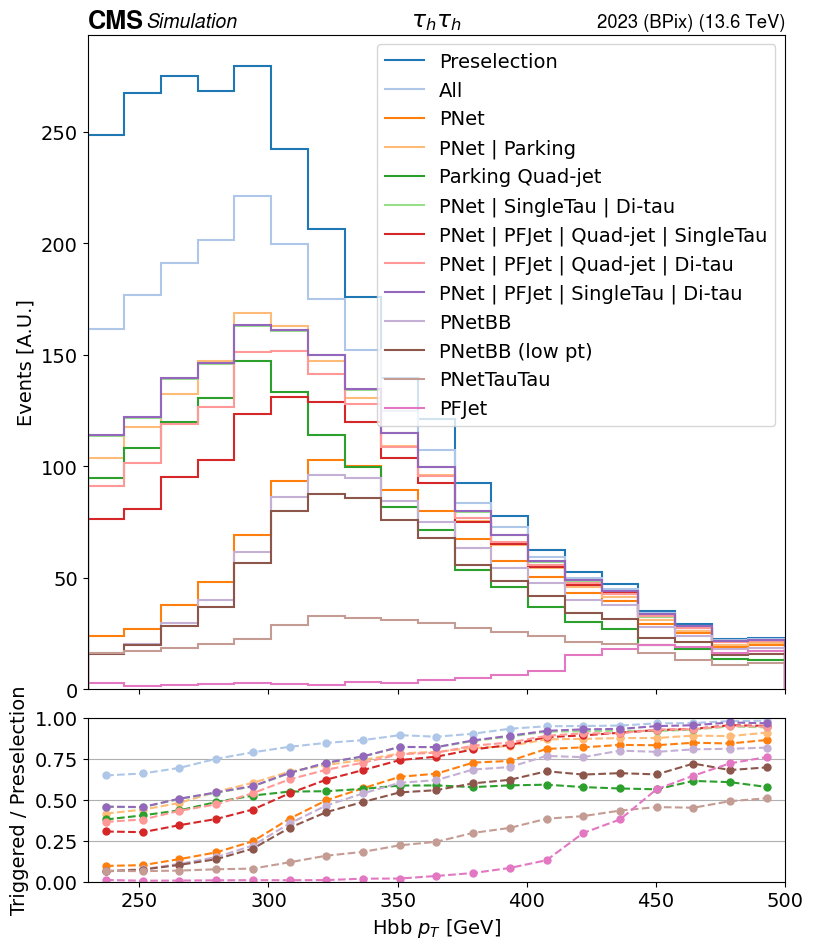

19


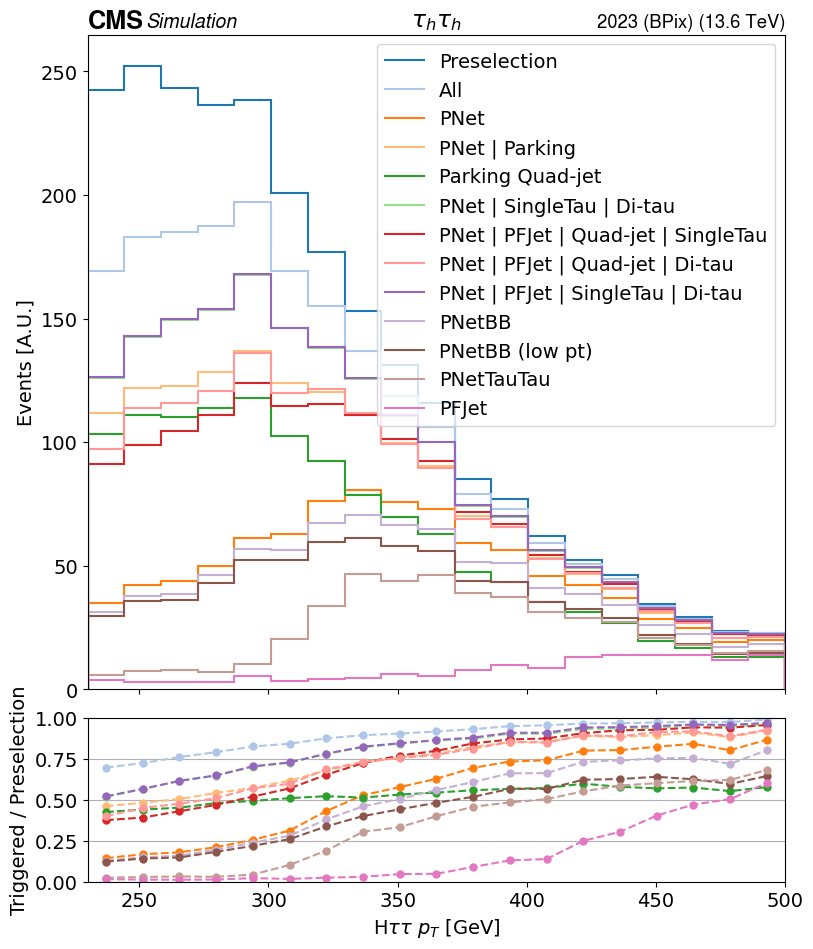

19


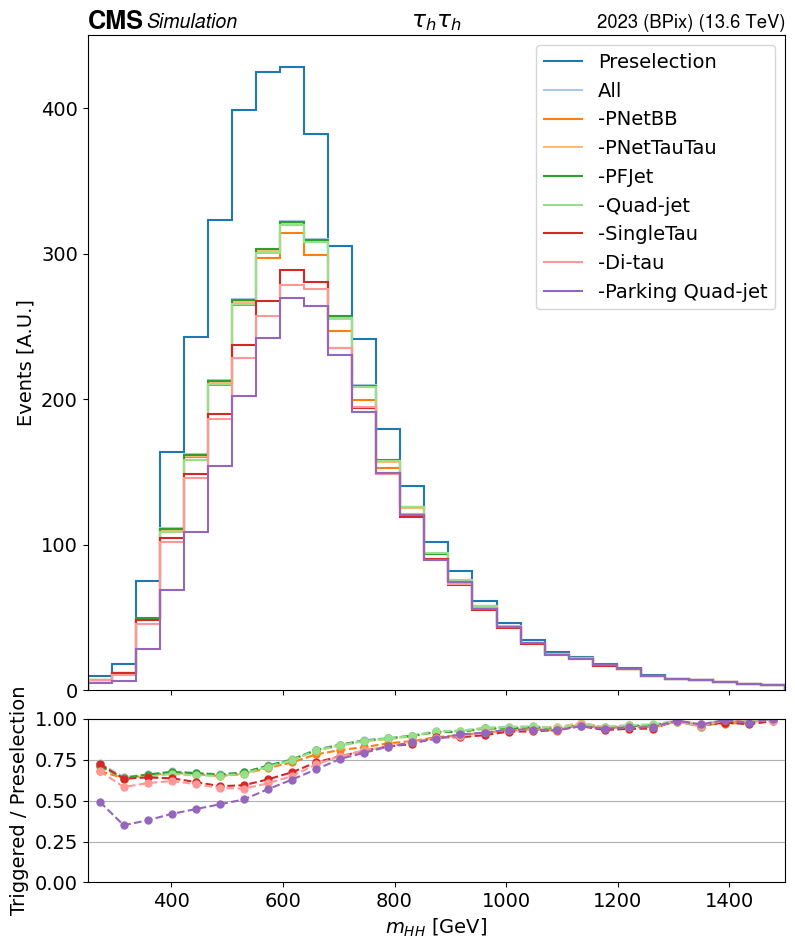

19


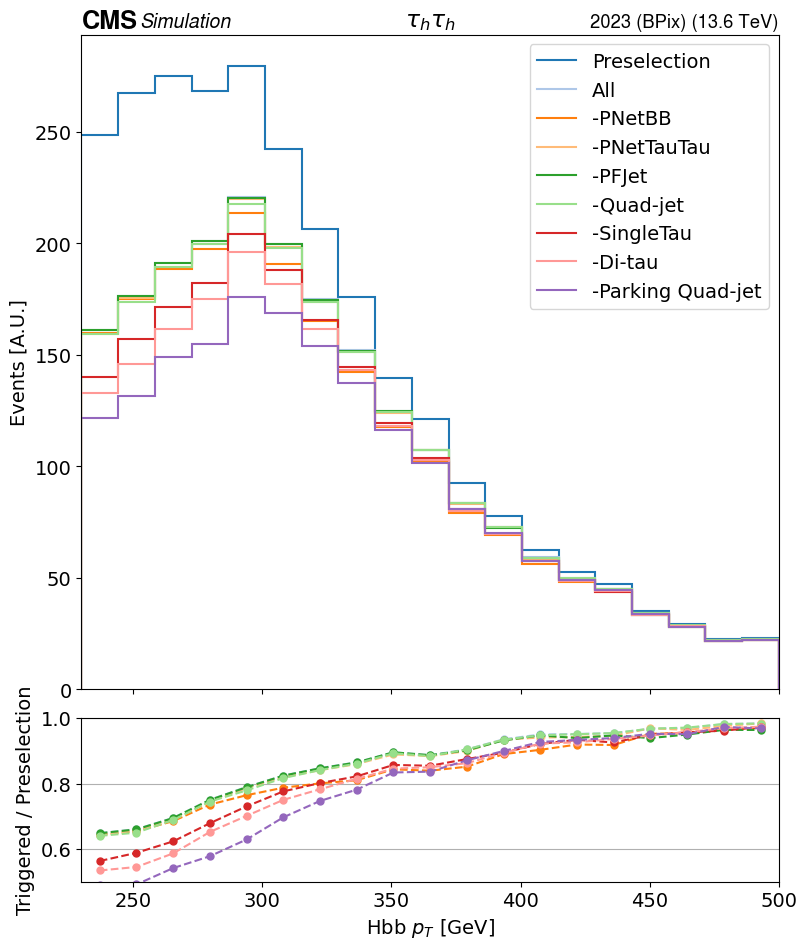

19


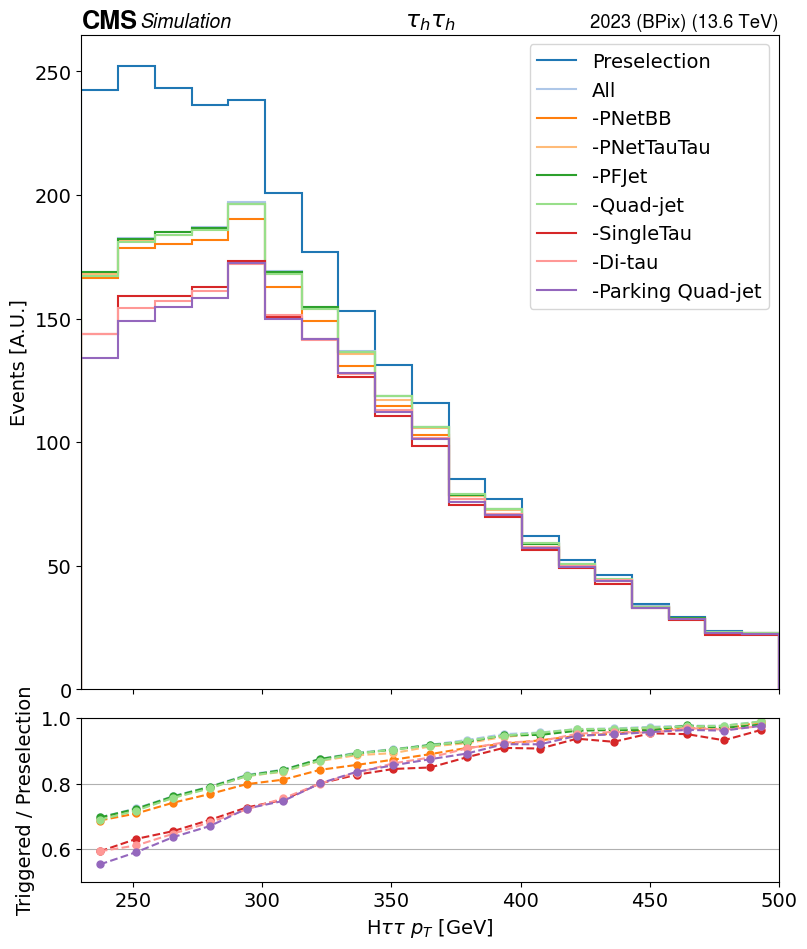

19


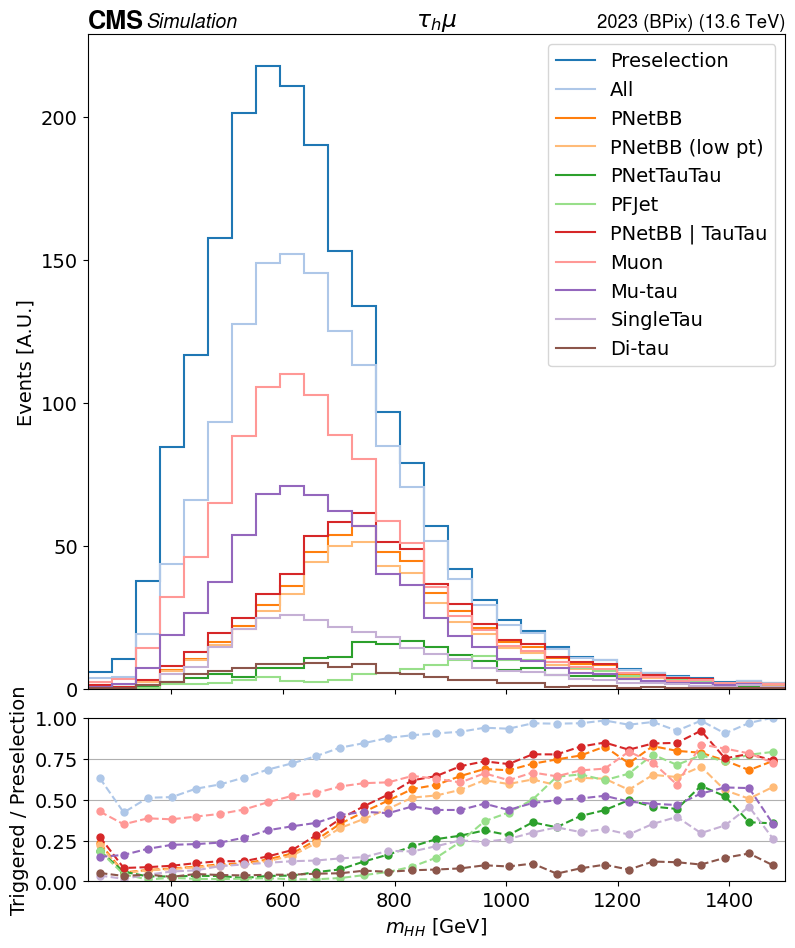

19


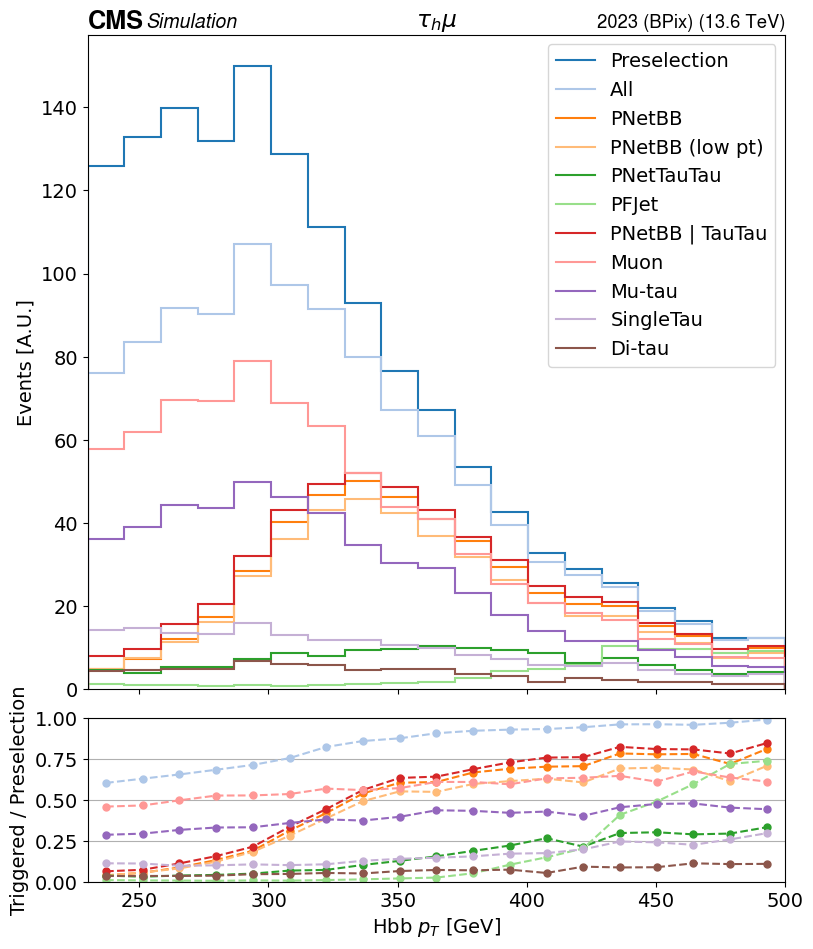

19


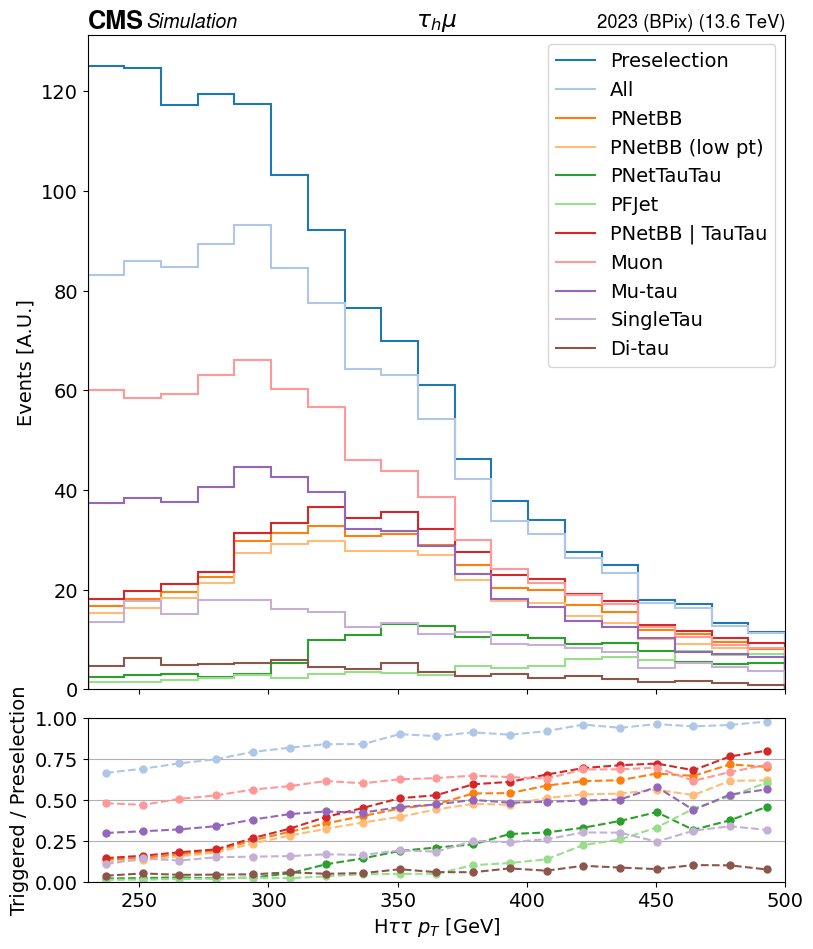

19


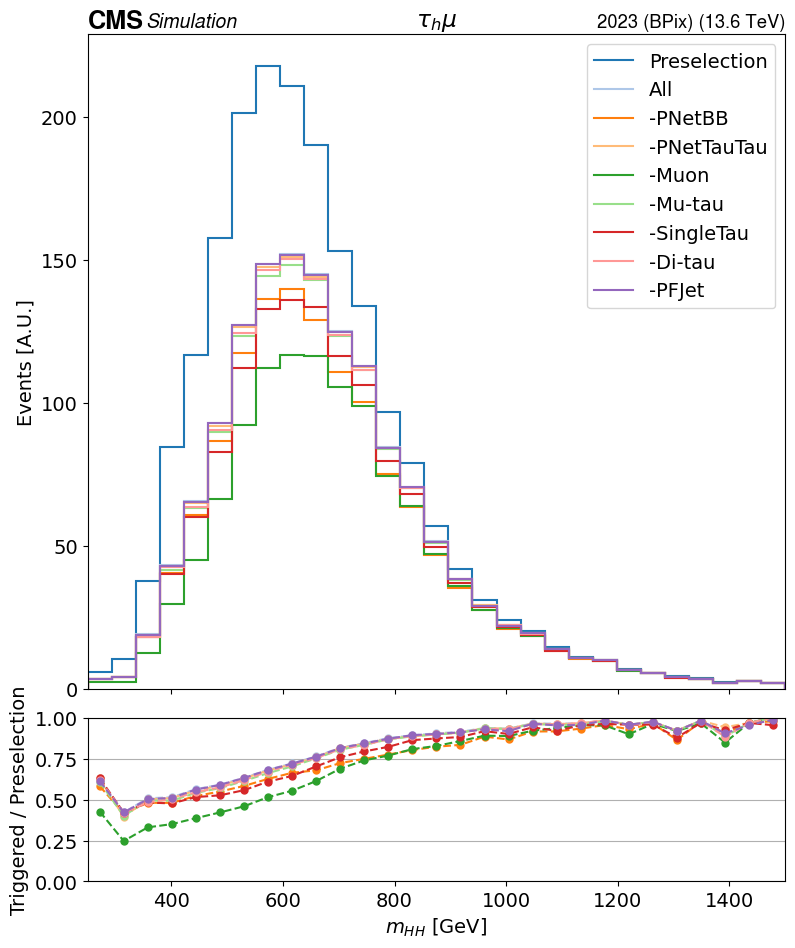

19


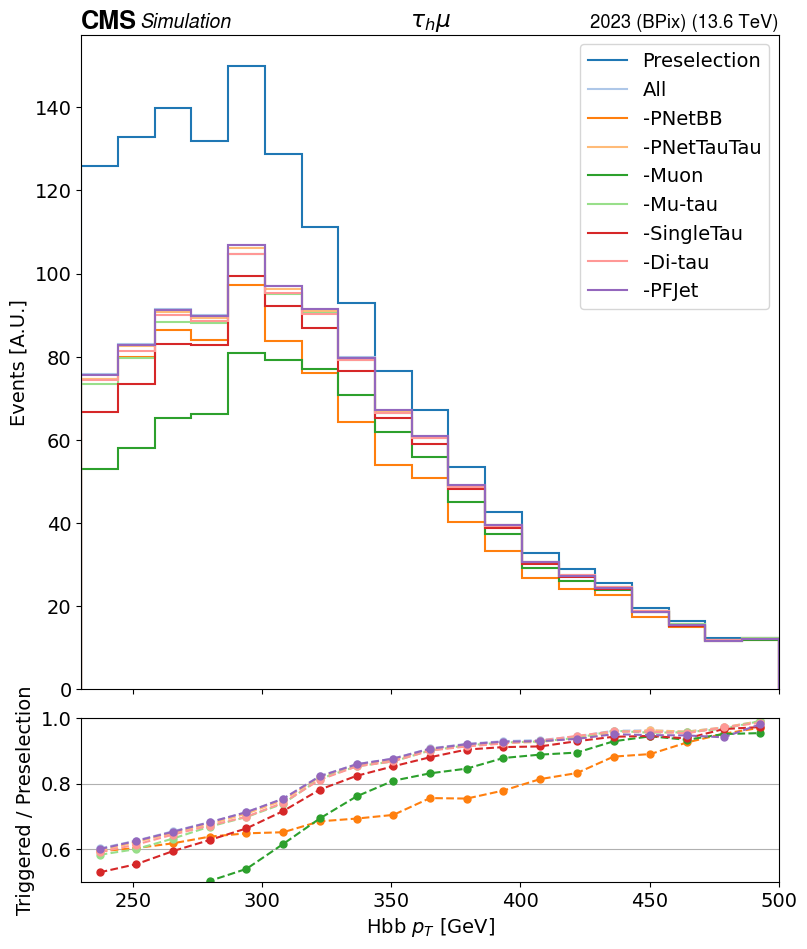

19


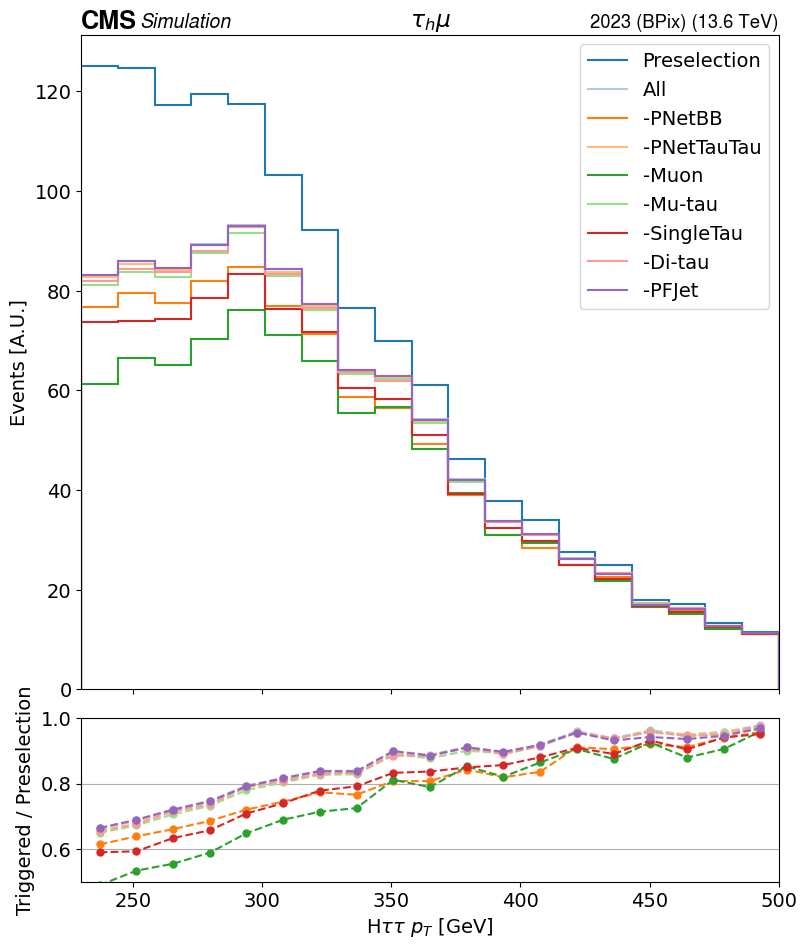

19


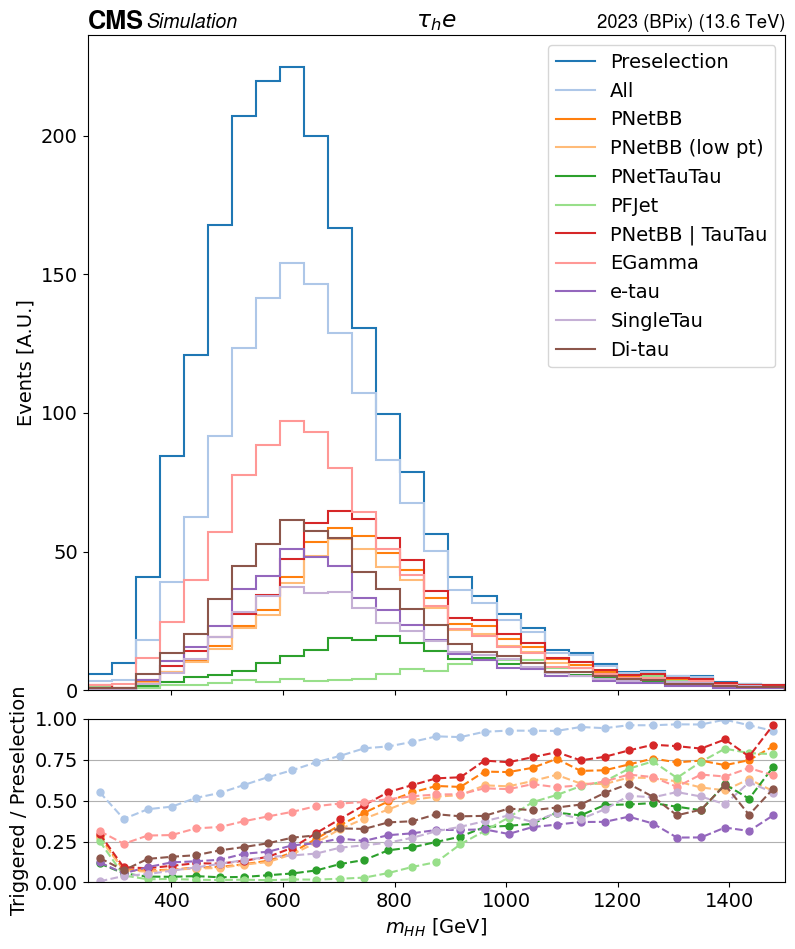

19


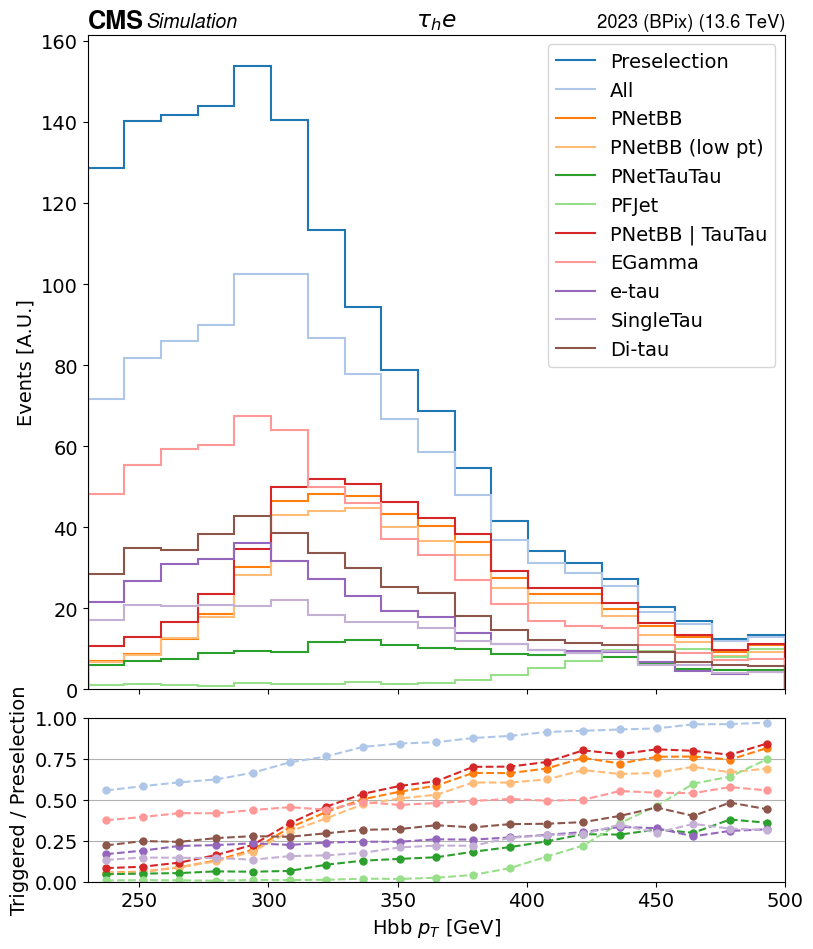

19


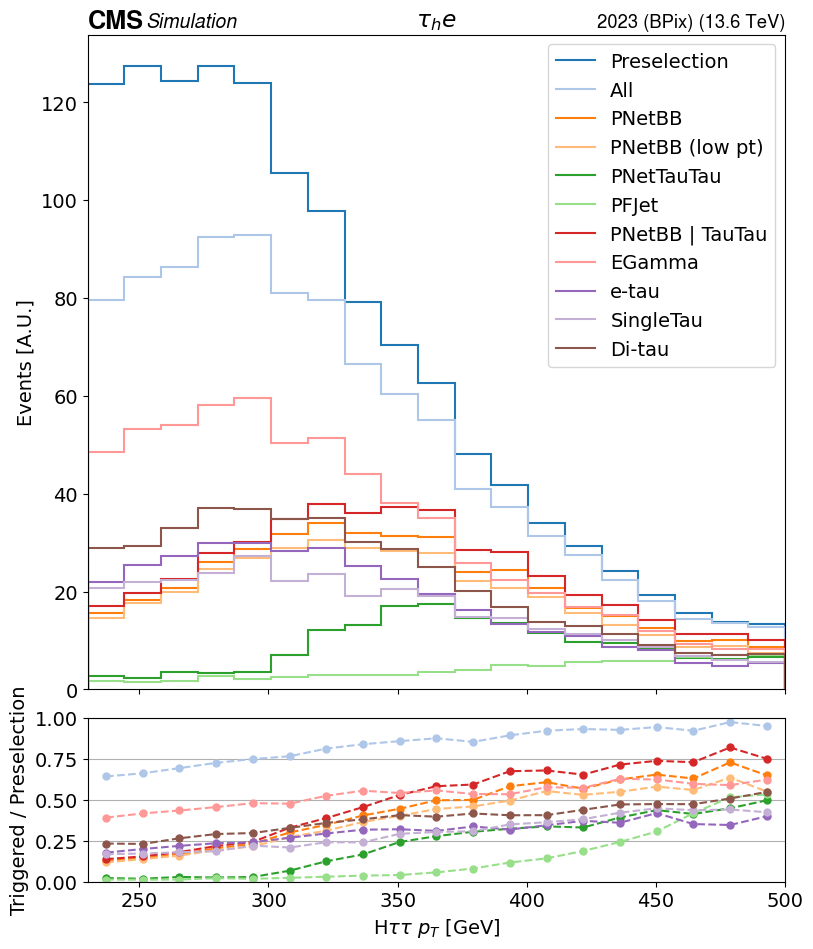

19


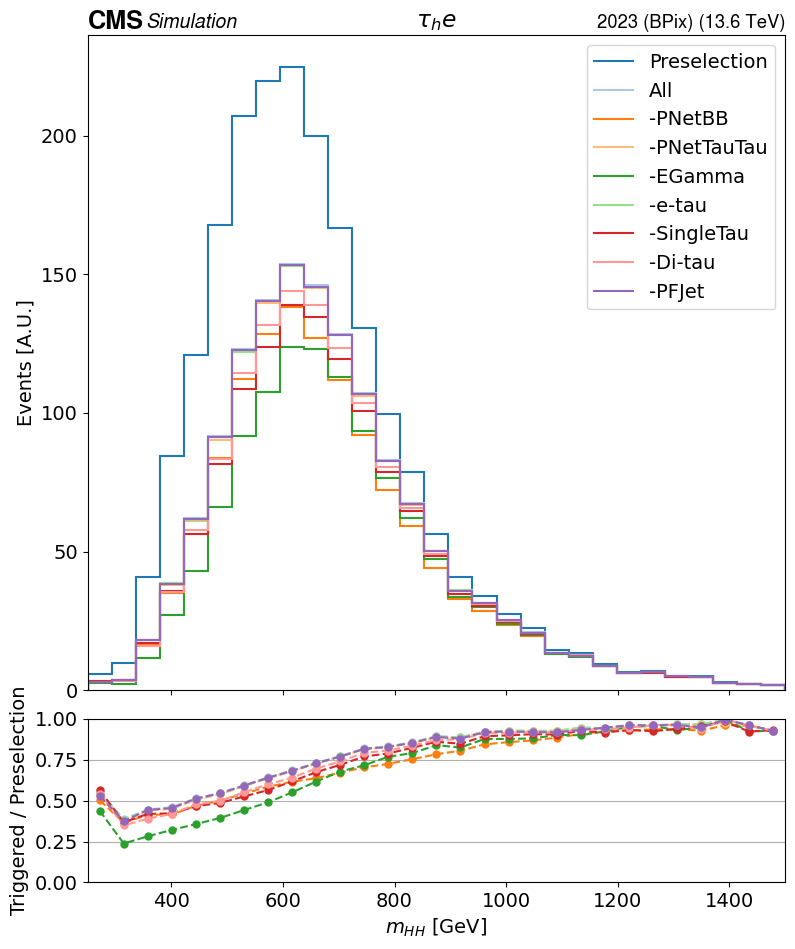

19


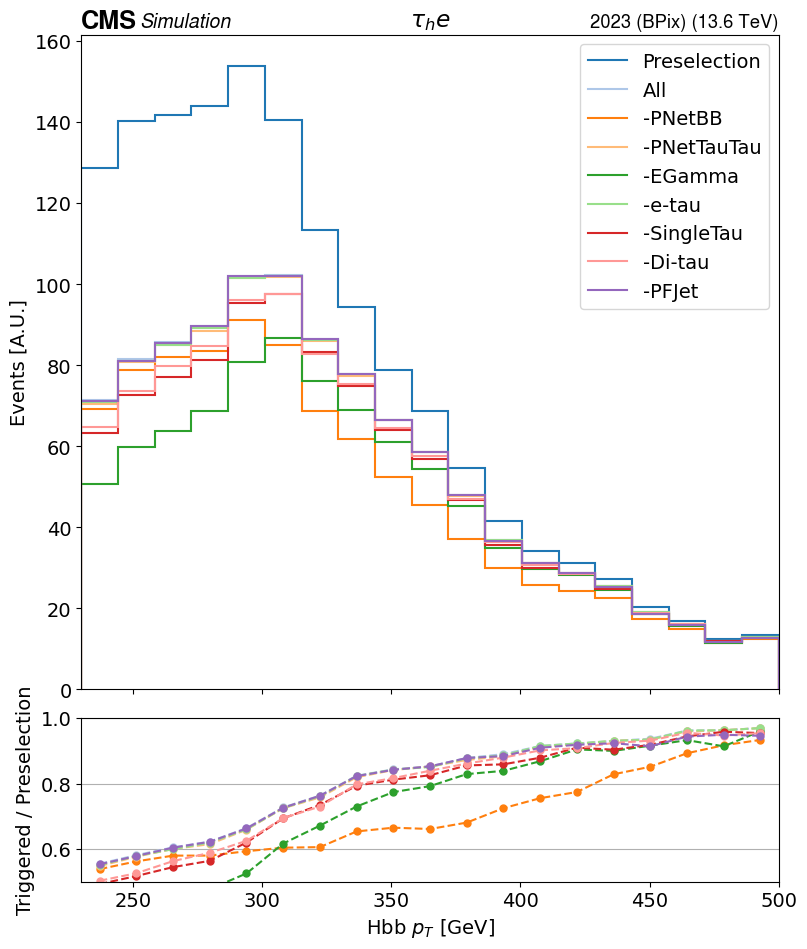

19


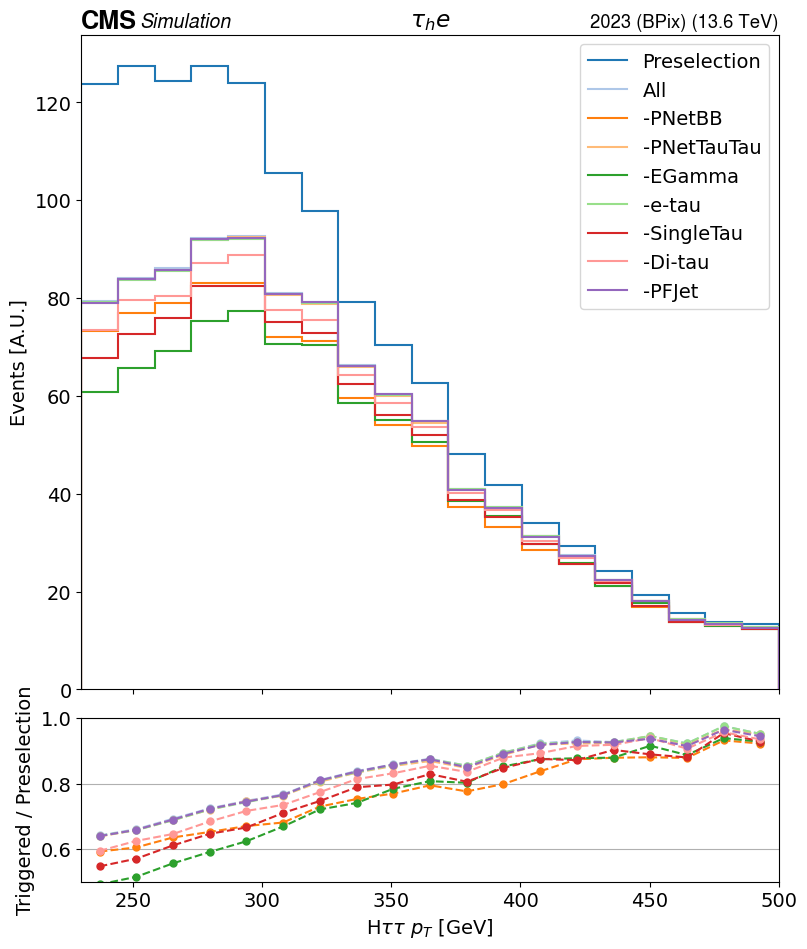

In [178]:
plt.rcParams.update({"font.size": 14})

plot_vars = [
    (mhh, "mhh", r"$m_{HH}$ [GeV]", np.linspace(250, 1500, 30)),
    (hbbpt, "hbbpt", r"Hbb $p_{T}$ [GeV]", np.linspace(230, 500, 20)),
    (httpt, "httpt", r"H$\tau\tau$ $p_{T}$ [GeV]", np.linspace(230, 500, 20)),
]

for cat, vals in triggers_dict.items():
    for kinvar, kinname, kinlabel, bins in plot_vars:
        (mask, label, triggers) = vals.values()

        fig, (ax, rax) = plt.subplots(
            2, 1, figsize=(9, 11), gridspec_kw=dict(height_ratios=[4, 1], hspace=0.07), sharex=True
        )

        hists = {"Preselection": np.histogram(kinvar[mask], bins=bins, weights=weights[mask])}
        ratios = {}

        hep.histplot(
            hists["Preselection"],
            yerr=False,
            label="Preselection",
            ax=ax,
        )

        colours = plt.cm.tab20.colors[1:]
        print(len(colours))

        for key, c in zip(triggers.keys(), colours):
            # print(key)
            hists[key] = np.histogram(
                kinvar[mask & triggers[key]], bins=bins, weights=weights[mask & triggers[key]]
            )
            ratios[key] = hists[key][0] / hists["Preselection"][0]

            hep.histplot(
                hists[key],
                yerr=False,
                label=key,
                ax=ax,
                color=c,
            )

            hep.histplot(
                (ratios[key], bins),
                yerr=False,
                label=key,
                ax=rax,
                histtype="errorbar",
                color=c,
                # markersize=20,
                linestyle="--",
                # markeredgewidth=3,
                # fillstyle='none',
            )

        ax.set_ylabel("Events [A.U.]")
        ax.legend()
        ax.set_title(label)
        ax.set_xlim(bins[0], bins[-1])
        ax.set_ylim(0)

        # rax.legend()
        rax.grid(axis="y")
        rax.set_xlabel(kinlabel)
        rax.set_ylabel("Triggered / Preselection")

        ylims = [0.5, 1] if (cat.endswith("minus") and kinname != "mhh") else [0, 1]
        rax.set_ylim(ylims)

        hep.cms.label(ax=ax, data=False, year="2023 (BPix)", com="13.6")

        plt.savefig(plot_dir / f"{kinname}_{cat}.pdf", bbox_inches="tight")
        plt.show()

In [179]:
from boostedhh.utils import PAD_VAL

tvars = {}
qcdouts = ["QCD0HF", "QCD1HF", "QCD2HF"]  # HF = heavy flavor = {c,b}
topouts = ["TopW", "TopbW"]  # "TopbWev", "TopbWmv", "TopbWtauhv", "TopbWq", "TopbWqq"]
tvars["PQCD"] = sum([df[f"ak8FatJetParT{k}"] for k in qcdouts]).to_numpy()
tvars["PTop"] = sum([df[f"ak8FatJetParT{k}"] for k in topouts]).to_numpy()
tvars["XbbvsQCD"] = np.nan_to_num(
    df[f"ak8FatJetParTXbb"] / (df[f"ak8FatJetParTXbb"] + tvars["PQCD"]),
    nan=PAD_VAL,
)
tvars["XbbvsQCDTop"] = np.nan_to_num(
    df["ak8FatJetParTXbb"] / (df["ak8FatJetParTXbb"] + tvars["PQCD"] + tvars["PTop"]),
    nan=PAD_VAL,
)

In [180]:
print(np.argmax(tvars["XbbvsQCD"][:, 2] - 0.25))
print(np.shape(tvars["XbbvsQCD"]))

291083
(321569, 3)


In [181]:
cats = [cat for cat in triggers_dict.keys() if not cat.endswith("minus")]
boostedsels = {
    "1 boosted jet (> 250)": df["ak8FatJetPt"][0] > 250,
    "2 boosted jets (> 250)": (df["ak8FatJetPt"][0] > 250) & (df["ak8FatJetPt"][1] > 250),
    "2 boosted jets (>250, >230)": (df["ak8FatJetPt"][0] > 250) & (df["ak8FatJetPt"][1] > 230),
    "2 boosted jets (>250, >200)": (df["ak8FatJetPt"][0] > 250) & (df["ak8FatJetPt"][1] > 200),
    "2 boosted jets (>250, >200), XbbvsQCD > 0.95": (df["ak8FatJetPt"][0] > 250)
    & (df["ak8FatJetPt"][1] > 200)
    & (tvars["XbbvsQCD"][:, 0] > 0.95),
    "2 boosted jets (>250, >200), XbbvsQCDTop > 0.95": (df["ak8FatJetPt"][0] > 250)
    & (df["ak8FatJetPt"][1] > 200)
    & (tvars["XbbvsQCDTop"][:, 0] > 0.95),
}

for cat in cats:
    print(cat)
    trig_table = pd.DataFrame(index=list(boostedsels.keys()))
    mask = triggers_dict[cat]["mask"]

    for tkey, tsel in triggers_dict[f"{cat}_minus"]["triggers"].items():
        effs = []
        for bkey, sel in boostedsels.items():
            eff = np.sum(mask & sel & tsel) / np.sum(mask & sel)
            effs.append(f"{eff * 100:.1f}")

        ttkey = tkey.replace("- ", "-") if tkey.startswith("-") else "All"
        trig_table[ttkey] = effs

    sel_effs = []
    for bkey, sel in boostedsels.items():
        eff = np.sum(mask & sel) / np.sum(mask)
        sel_effs.append(f"{eff * 100:.1f}")
    trig_table["Preselection"] = sel_effs

    trig_table.to_csv(plot_dir / f"trig_effs_{cat}.csv")
    print(trig_table.to_markdown(index=True))

tauhh
|                                                 |   All |   -PNetBB |   -PNetTauTau |   -PFJet |   -Quad-jet |   -SingleTau |   -Di-tau |   -Parking Quad-jet |   Preselection |
|:------------------------------------------------|------:|----------:|--------------:|---------:|------------:|-------------:|----------:|--------------------:|---------------:|
| 1 boosted jet (> 250)                           |  82.5 |      79.9 |          81.8 |     82.2 |        81.9 |         76.2 |      75.7 |                72.3 |           76.9 |
| 2 boosted jets (> 250)                          |  94.9 |      93.5 |          93.9 |     94.3 |        94.7 |         87.9 |      93.5 |                91.7 |           23.1 |
| 2 boosted jets (>250, >230)                     |  93.3 |      91.8 |          92.3 |     92.8 |        93.1 |         85.3 |      91.5 |                89.1 |           29.5 |
| 2 boosted jets (>250, >200)                     |  90.5 |      88.7 |          89.5 |     90.1 | 

tauhh

|                                                 |   All |   -PNetBB |   -PNetTauTau |   -PFJet |   -Quad-jet |   -SingleTau |   -Di-tau |   -Parking Quad-jet |   Preselection |
|:------------------------------------------------|------:|----------:|--------------:|---------:|------------:|-------------:|----------:|--------------------:|---------------:|
| 1 boosted jet (> 250)                           |  82.5 |      79.9 |          81.8 |     82.2 |        81.9 |         76.2 |      75.7 |                72.3 |           76.9 |
| 2 boosted jets (> 250)                          |  94.9 |      93.5 |          93.9 |     94.3 |        94.7 |         87.9 |      93.5 |                91.7 |           23.1 |
| 2 boosted jets (>250, >230)                     |  93.3 |      91.8 |          92.3 |     92.8 |        93.1 |         85.3 |      91.5 |                89.1 |           29.5 |
| 2 boosted jets (>250, >200)                     |  90.5 |      88.7 |          89.5 |     90.1 |        90.2 |         82.2 |      87.4 |                84.4 |           39.8 |
| 2 boosted jets (>250, >200), XbbvsQCD > 0.95    |  99.2 |      96   |          99   |     99.1 |        99.1 |         98.4 |      99   |                97.8 |            5   |
| 2 boosted jets (>250, >200), XbbvsQCDTop > 0.95 |  99.5 |      96.6 |          99.4 |     99.5 |        99.4 |         98.8 |      99.4 |                98.2 |            3.9 |

tauhmu

|                                                 |   All |   -PNetBB |   -PNetTauTau |   -Muon |   -Mu-tau |   -SingleTau |   -Di-tau |   -PFJet |   Preselection |
|:------------------------------------------------|------:|----------:|--------------:|--------:|----------:|-------------:|----------:|---------:|---------------:|
| 1 boosted jet (> 250)                           |  78.5 |      70.7 |          78   |    66.4 |      77.3 |         73.1 |      77.5 |     78.2 |           76.7 |
| 2 boosted jets (> 250)                          |  92.9 |      87.5 |          92.1 |    88.3 |      92.6 |         85.4 |      92.5 |     92.3 |           17.6 |
| 2 boosted jets (>250, >230)                     |  90.6 |      85.2 |          89.7 |    84.9 |      90.2 |         82.2 |      90.1 |     90.1 |           23   |
| 2 boosted jets (>250, >200)                     |  87.4 |      81.4 |          86.5 |    79.9 |      86.8 |         79   |      86.8 |     86.9 |           32.2 |
| 2 boosted jets (>250, >200), XbbvsQCD > 0.95    |  98   |      85.6 |          97.8 |    96.4 |      97.9 |         97   |      97.9 |     97.9 |            4.5 |
| 2 boosted jets (>250, >200), XbbvsQCDTop > 0.95 |  98.5 |      86   |          98.4 |    97   |      98.4 |         97.7 |      98.4 |     98.4 |            3.5 |

tauhe

|                                                 |   All |   -PNetBB |   -PNetTauTau |   -EGamma |   -e-tau |   -SingleTau |   -Di-tau |   -PFJet |   Preselection |
|:------------------------------------------------|------:|----------:|--------------:|----------:|---------:|-------------:|----------:|---------:|---------------:|
| 1 boosted jet (> 250)                           |  75.1 |      66.2 |          74.6 |      65.2 |     74.9 |         70   |      72   |     74.7 |           76.9 |
| 2 boosted jets (> 250)                          |  92   |      86.3 |          91.1 |      89.1 |     91.9 |         85.1 |      91   |     91.1 |           17.6 |
| 2 boosted jets (>250, >230)                     |  89.9 |      84   |          88.9 |      86.4 |     89.8 |         82   |      88.6 |     89.1 |           23.1 |
| 2 boosted jets (>250, >200)                     |  86.1 |      79.6 |          85.2 |      81.5 |     86   |         77.9 |      84.4 |     85.5 |           32.3 |
| 2 boosted jets (>250, >200), XbbvsQCD > 0.95    |  97.6 |      84.8 |          97.5 |      96.9 |     97.6 |         96.6 |      97.2 |     97.5 |            4.4 |
| 2 boosted jets (>250, >200), XbbvsQCDTop > 0.95 |  98.2 |      85.5 |          98.1 |      97.6 |     98.2 |         97.2 |      97.8 |     98.2 |            3.4 |

In [182]:
# mask = triggers_dict["tauhh"]["mask"]
# print(triggers_dict["tauhh"]["triggers"].keys())
# print(
#     np.sum(triggers_dict["tauhh"]["triggers"]["PNetBB | TauTau | PFJet (all)"][mask])
#     / np.sum(mask)
# )
# print(
#     np.sum(
#         ((triggers_dict["tauhh"]["triggers"]["PNetBB | PFJet425 | Di-tau"]) * twoboosted)[
#             mask
#         ]
#     )
#     / np.sum((mask * twoboosted))
# )

In [183]:
# print(len(twoboosted))

# print(len(triggers_dict["tauhh"]["triggers"]["PNetBB | PFJet425 | Di-tau"]))

In [184]:
# mask = triggers_dict["tauhmu"]["mask"]
# print(
#     np.sum(triggers_dict["tauhmu"]["triggers"]["ParticleNetBB | IsoMu24 | Mu50 | Mu-tau+Jet"][mask])
#     / np.sum(mask)
# )
# print(
#     # np.sum(
#         (
#             (triggers_dict["tauhmu"]["triggers"]["ParticleNetBB | IsoMu24 | Mu50 | Mu-tau+Jet"])
#             * twoboosted
#         )[mask]
#     )
#     / np.sum((mask * twoboosted))
# )

In [185]:
mask = triggers_dict["tauhe"]["mask"]
print(
    np.sum(triggers_dict["tauhe"]["triggers"]["ParticleNetBB | Electron | E-tau"][mask])
    / np.sum(mask)
)
print(
    np.sum(
        ((triggers_dict["tauhe"]["triggers"]["ParticleNetBB | Electron | E-tau"]) * twoboosted)[
            mask
        ]
    )
    / np.sum((mask * twoboosted))
)

KeyError: 'ParticleNetBB | Electron | E-tau'

4b triggers

In [ ]:
plt.rcParams.update({"font.size": 14})

plot_vars = [
    (mhh, "mhh", r"$m_{HH}$ [GeV]", np.linspace(250, 1500, 30)),
    (higgs[:, 0].pt, "hbbpt1", r"H$_1$ $p_{T}$ [GeV]", np.linspace(230, 500, 20)),
    (higgs[:, 1].pt, "hbbpt2", r"H$_2$ $p_{T}$ [GeV]", np.linspace(230, 500, 20)),
]

cat = "bbbb"
(mask, label, triggers) = (
    np.ones(len(df4b)).astype(bool),
    "HH4b",
    {"ParticleNetBB | PFJet425 ": bbbb_triggered},
)


for kinvar, kinname, kinlabel, bins in plot_vars:
    fig, (ax, rax) = plt.subplots(
        2, 1, figsize=(12, 14), gridspec_kw=dict(height_ratios=[4, 1], hspace=0.07), sharex=True
    )

    hists = {"Preselection": np.histogram(kinvar[mask], bins=bins, weights=weights[mask])}
    ratios = {}

    hep.histplot(
        hists["Preselection"],
        yerr=False,
        label="Preselection",
        ax=ax,
    )

    colours = plt.cm.tab10.colors[1:]

    for key, c in zip(triggers.keys(), colours):
        # print(key)
        hists[key] = np.histogram(
            kinvar[mask & triggers[key]], bins=bins, weights=weights[mask & triggers[key]]
        )
        ratios[key] = hists[key][0] / hists["Preselection"][0]

        hep.histplot(
            hists[key],
            yerr=False,
            label=key,
            ax=ax,
            color=c,
        )

        hep.histplot(
            (ratios[key], bins),
            yerr=False,
            label=key,
            ax=rax,
            histtype="errorbar",
            color=c,
            # markersize=20,
            linestyle="--",
            # markeredgewidth=3,
            # fillstyle='none',
        )

    ax.set_ylabel("Events [A.U.]")
    ax.legend()
    ax.set_title(label)
    ax.set_xlim(bins[0], bins[-1])
    ax.set_ylim(0)

    # rax.legend()
    rax.grid(axis="y")
    rax.set_xlabel(kinlabel)
    rax.set_ylabel("Triggered / Preselection")

    ylims = [0.5, 1] if (cat.endswith("minus") and kinname != "mhh") else [0, 1]
    rax.set_ylim(ylims)

    hep.cms.label(ax=ax, data=False, year=2022, com="13.6")

    plt.savefig(plot_dir / f"{kinname}_{cat}.pdf", bbox_inches="tight")
    plt.show()

NameError: name 'df4b' is not defined

All
-PNetBB
-PNetTauTau
-EGamma
-e-tau
-SingleTau
-Di-tau
-PFJet


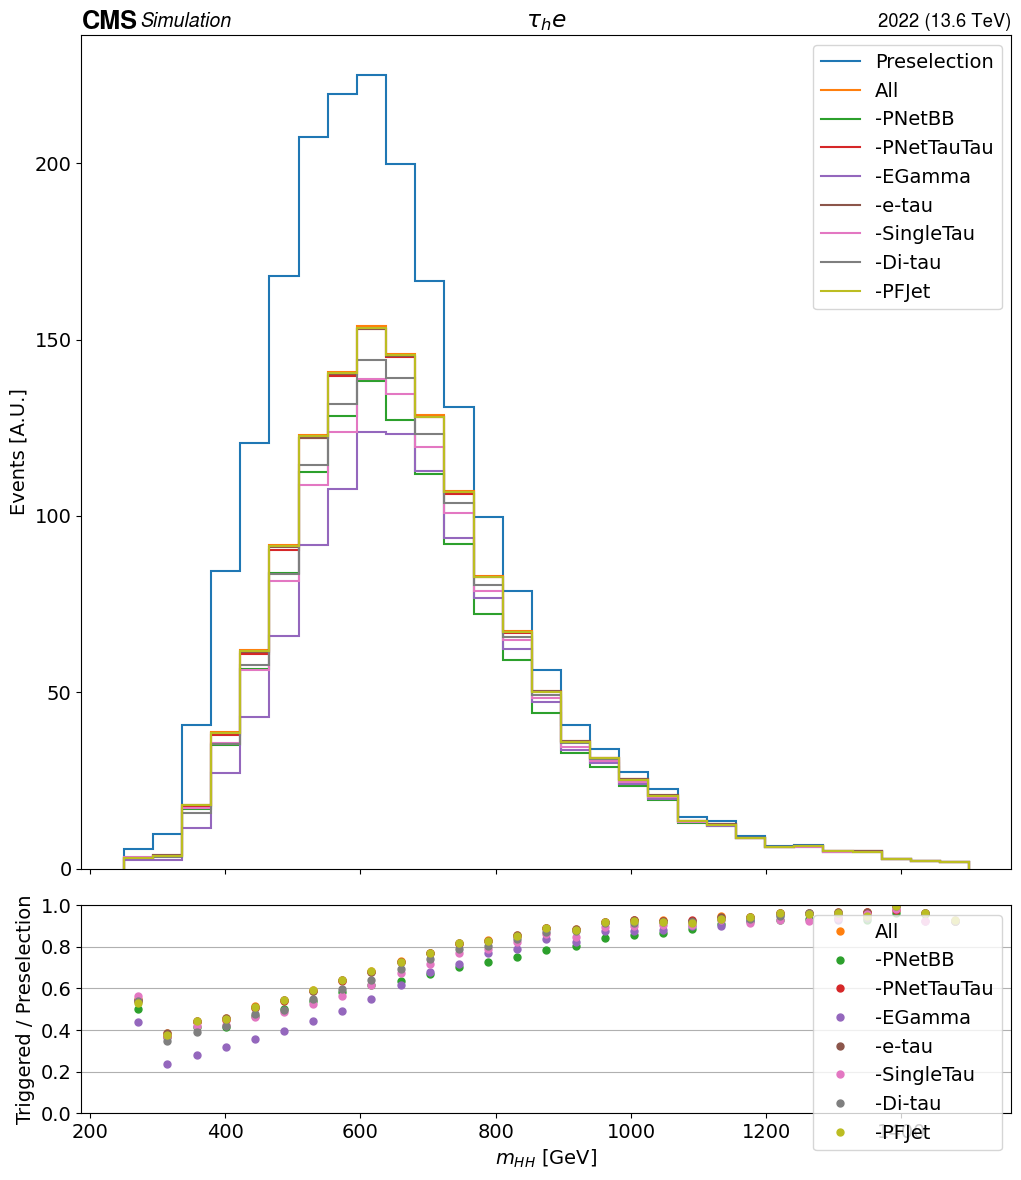

In [ ]:
plt.rcParams.update({"font.size": 14})


fig, (ax, rax) = plt.subplots(
    2, 1, figsize=(12, 14), gridspec_kw=dict(height_ratios=[4, 1], hspace=0.07), sharex=True
)

bins = np.linspace(250, 1500, 30)
hists = {"Preselection": np.histogram(mhh[mask], bins=bins, weights=weights[mask])}
ratios = {}

hep.histplot(
    hists["Preselection"],
    yerr=False,
    label="Preselection",
    ax=ax,
)

colours = plt.cm.tab10.colors[1:]

for key, c in zip(triggers.keys(), colours):
    print(key)
    hists[key] = np.histogram(
        mhh[mask & triggers[key]], bins=bins, weights=weights[mask & triggers[key]]
    )
    ratios[key] = hists[key][0] / hists["Preselection"][0]

    hep.histplot(
        hists[key],
        yerr=False,
        label=key,
        ax=ax,
        color=c,
    )

    hep.histplot(
        (ratios[key], bins),
        yerr=False,
        label=key,
        ax=rax,
        histtype="errorbar",
        color=c,
        capsize=4,
    )

ax.set_ylabel("Events [A.U.]")
ax.legend()
ax.set_title(label)

rax.legend()
rax.grid(axis="y")
rax.set_xlabel(r"$m_{HH}$ [GeV]")
rax.set_ylabel("Triggered / Preselection")
rax.set_ylim(0, 1)

hep.cms.label(ax=ax, data=False, year=2022, com="13.6")

plt.savefig(plot_dir / f"mhh_{cat}.pdf", bbox_inches="tight")
plt.show()

(array([78824.,  2497.,  1606.,  1061.,   893.,   782.,   653.,   613.,
          522.,   457.,   435.,   414.,   426.,   421.,   407.,   396.,
          357.,   359.,   340.,   325.,   321.,   337.,   323.,   338.,
          353.,   322.,   315.,   304.,   307.,   299.,   324.,   315.,
          295.,   343.,   315.,   325.,   327.,   297.,   364.,   341.,
          350.,   363.,   328.,   344.,   346.,   356.,   356.,   382.,
          384.,   398.,   402.,   420.,   423.,   390.,   477.,   421.,
          466.,   420.,   448.,   440.,   455.,   520.,   518.,   512.,
          533.,   514.,   529.,   551.,   564.,   565.,   617.,   631.,
          593.,   651.,   694.,   665.,   677.,   706.,   737.,   817.,
          776.,   773.,   837.,   882.,   876.,   947.,   973.,   972.,
         1052.,  1071.,  1160.,  1113.,  1227.,  1279.,  1357.,  1412.,
         1759.,  2646., 21931.]),
 array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.

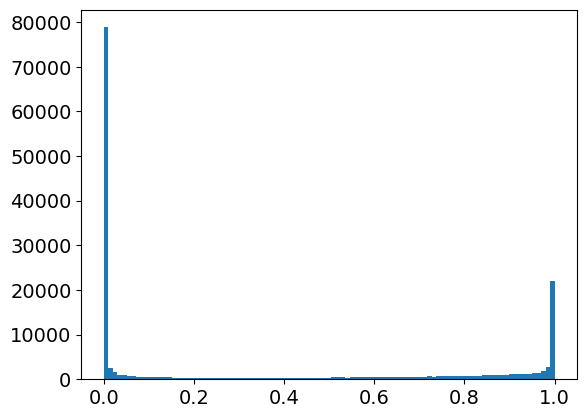

In [ ]:
ptaus = df["ak8FatJetParTXtauhtauh"] + df["ak8FatJetParTXtauhtaue"] + df["ak8FatJetParTXtauhtaum"]
plt.hist(ptaus[1], np.linspace(0, 1, 100))
# df["ak8FatJetParTXtauhtauh"]

## Mass

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

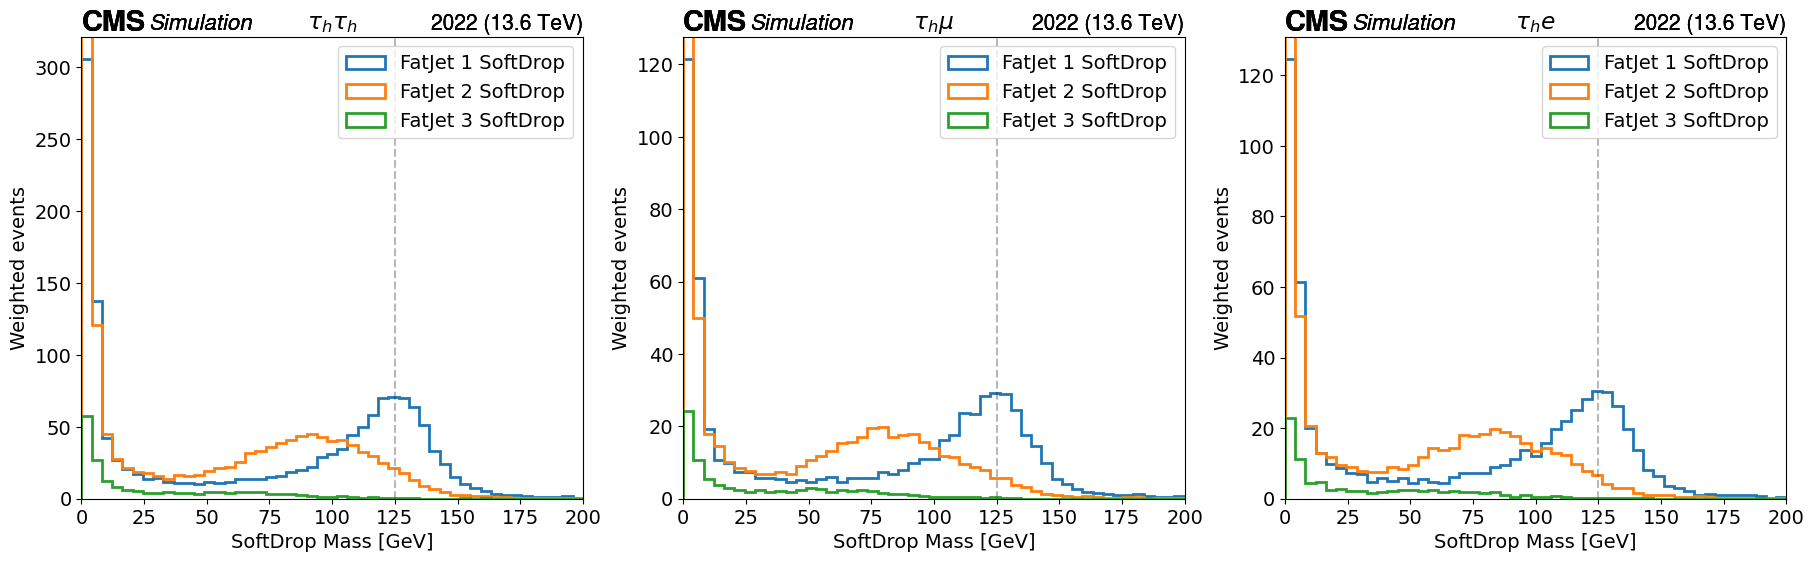

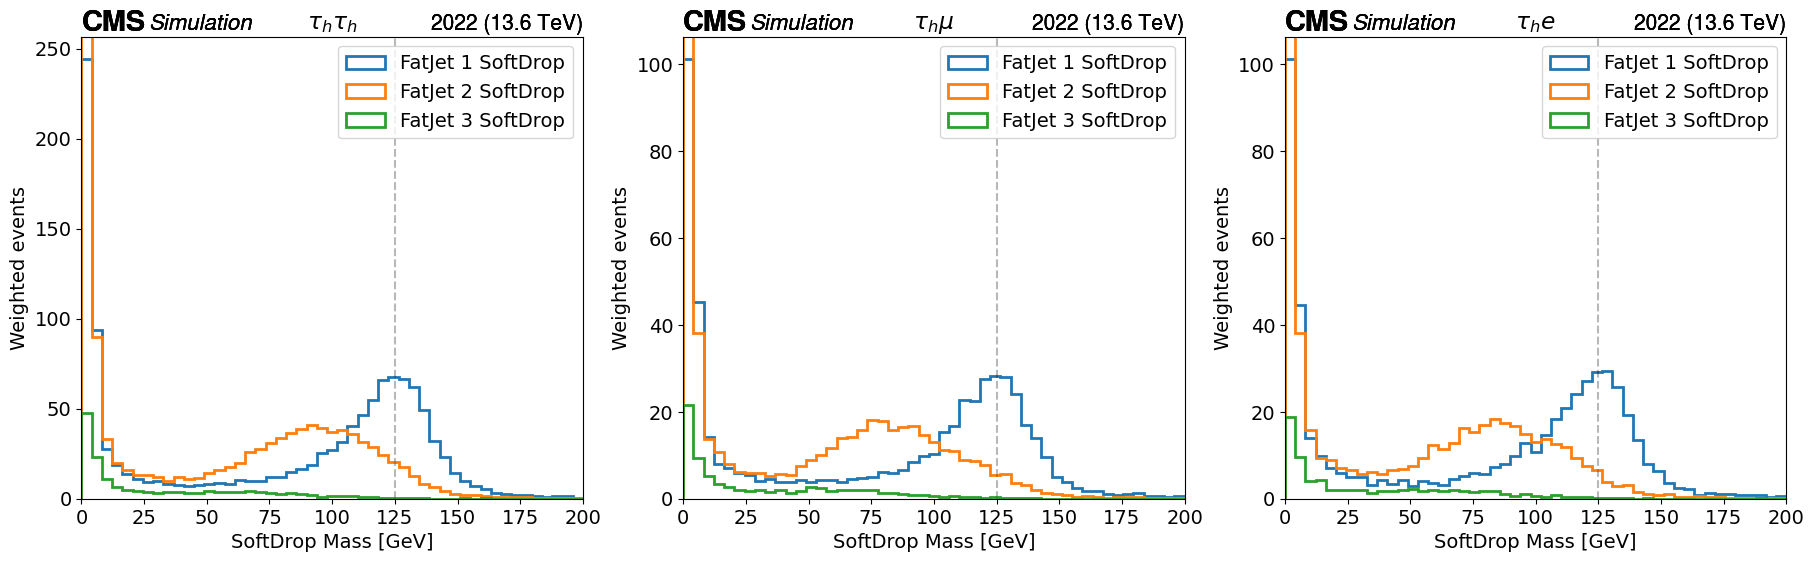

In [ ]:
cats = [cat for cat in triggers_dict.keys() if not cat.endswith("minus")]
bins = np.linspace(0, 200, 50)
linestyles = ["-", "--", "dotted", (0, (5, 10))]
colors = plt.cm.tab10.colors
numjets = 3
ylims = [310, 140, 150]

preselection = (df["ak8FatJetPt"][0] > 250) & (df["ak8FatJetPt"][1] > 200)

for l, tlabel in enumerate(["", "_triggered"]):
    fig, axs = plt.subplots(1, len(cats), figsize=(22, 6))
    for k, cat in enumerate(cats):
        mask = triggers_dict[cat]["mask"] & preselection
        label = triggers_dict[cat]["label"]
        triggersel = list(triggers_dict[f"{cat}_minus"]["triggers"].values())[0]

        ax = axs[k]

        for i in range(numjets):
            for j, (mkey, mlabel) in enumerate(zip(["ak8FatJetMsd"], ["SoftDrop"])):
                if l == 0:
                    ax.hist(
                        df[mkey][mask][i].values,
                        bins,
                        histtype="step",
                        weights=weights[mask],
                        label=f"FatJet {i + 1} {mlabel}",
                        linewidth=2,
                        # linestyle=linestyles[i],
                        color=colors[i],
                    )
                else:
                    ax.hist(
                        df[mkey][mask & triggersel][i].values,
                        bins,
                        histtype="step",
                        weights=weights[mask & triggersel],
                        # label=f"FatJet {i + 1} {mlabel} Triggered",
                        label=f"FatJet {i + 1} {mlabel}",
                        linewidth=2,
                        # linestyle=linestyles[2],
                        color=colors[i],
                    )

            ax.set_xlabel("SoftDrop Mass [GeV]")
            # rax.set_xlabel("Mass [GeV]")
            ax.set_ylabel("Weighted events")
            ax.set_title(label)
            ax.set_xlim(bins[0], bins[-1])
            ax.set_ylim(0)
            ax.legend()
            # ax.grid(axis="x")
            ax.vlines(125, 0, ax.get_ylim()[1], linestyle="--", color="k", alpha=0.1)
            # rax.set_ylabel("Triggered / Preselection")
            # rax.grid(axis="y")
            # rax.set_ylim(0.7, 1)
            hep.cms.label(ax=ax, data=False, year=2022, com="13.6", fontsize=16)

    plt.savefig(plot_dir / f"sdmass{tlabel}.pdf", bbox_inches="tight")
    plt.show()

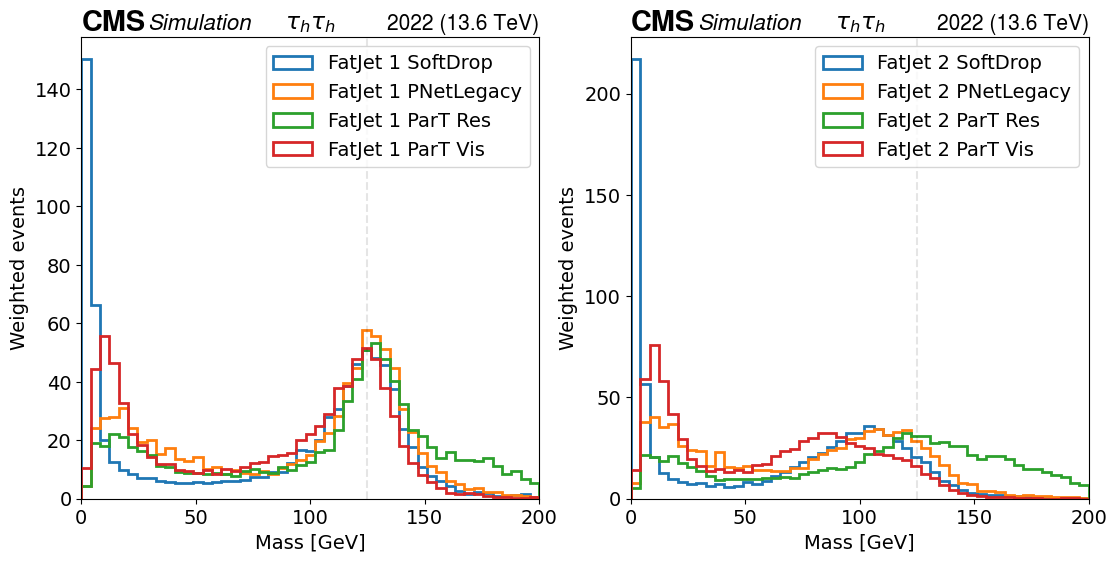

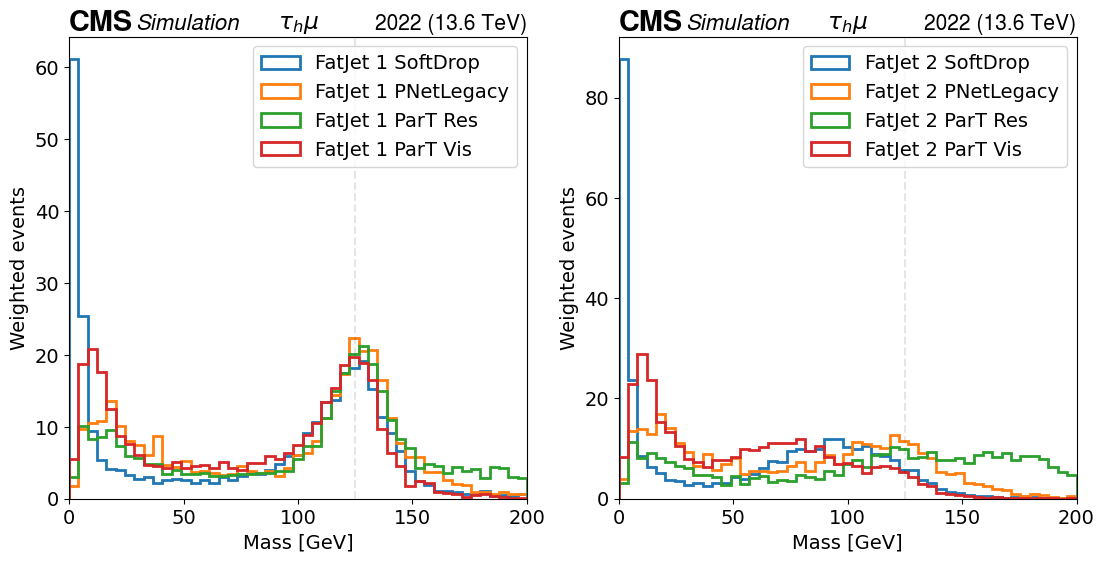

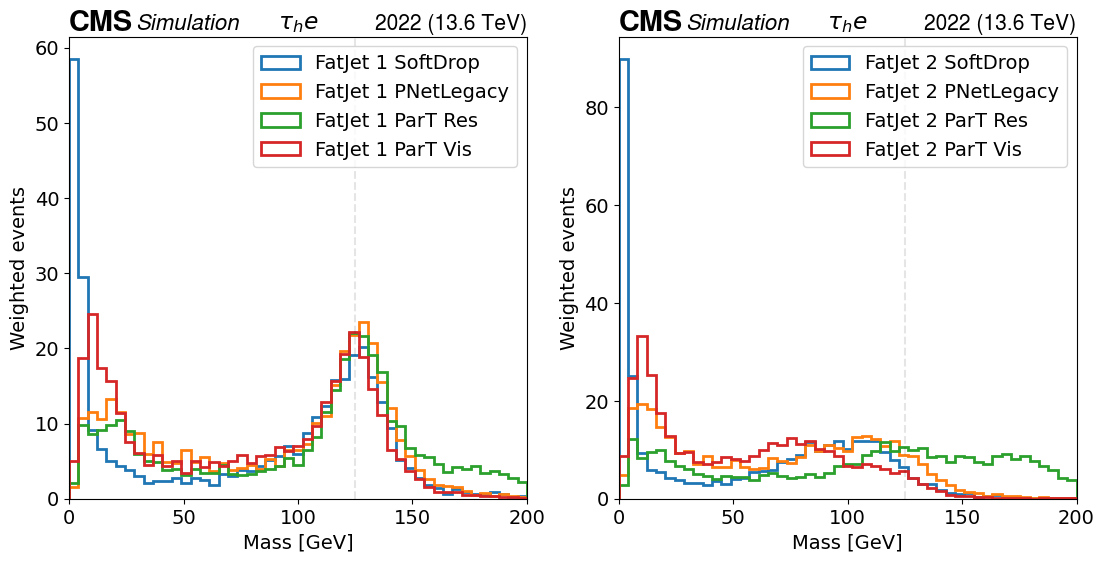

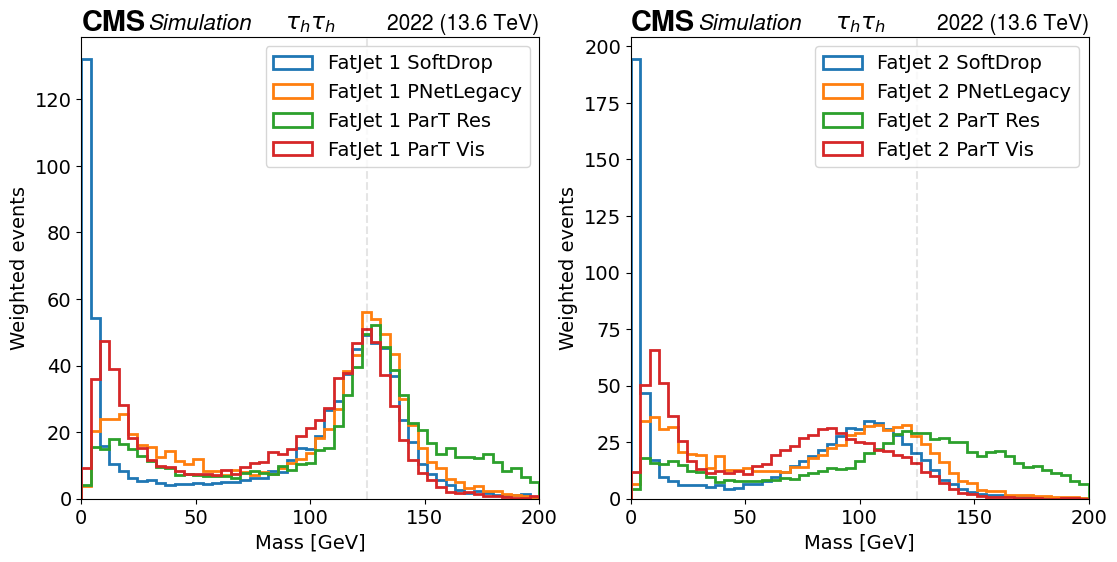

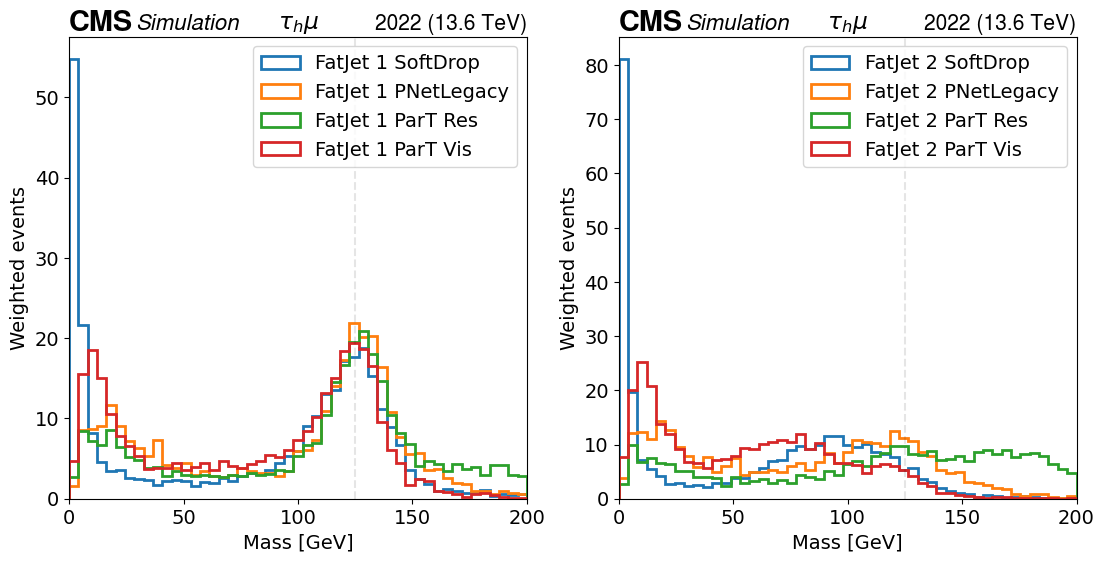

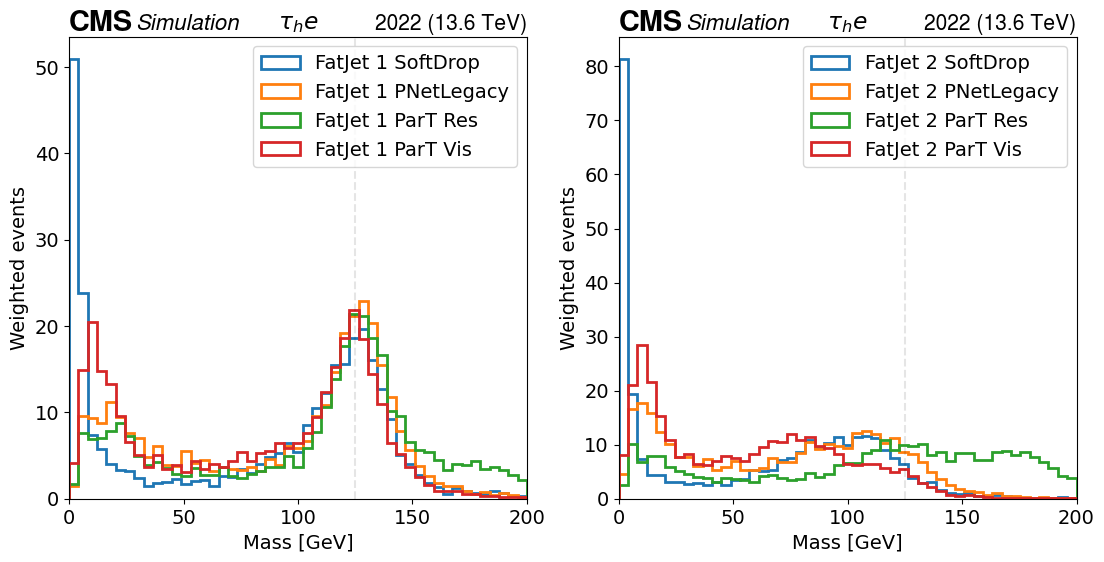

In [ ]:
cats = [cat for cat in triggers_dict.keys() if not cat.endswith("minus")]
bins = np.linspace(0, 200, 50)
linestyles = ["-", "--", "dotted", (0, (5, 10))]
colors = plt.cm.tab10.colors
numjets = 2
ylims = [310, 140, 150]

preselection = (df["ak8FatJetPt"][0] > 250) & (df["ak8FatJetPt"][1] > 250)

for l, tlabel in enumerate(["", "_triggered"]):
    for k, cat in enumerate(cats):
        mask = triggers_dict[cat]["mask"] & preselection
        label = triggers_dict[cat]["label"]
        triggersel = list(triggers_dict[f"{cat}_minus"]["triggers"].values())[0]

        # fig, (axs, raxs) = plt.subplots(2, 3, figsize=(24, 10), gridspec_kw=dict(height_ratios=[3, 1], hspace=0.07), sharex=True)
        fig, axs = plt.subplots(1, numjets, figsize=(13, 6))

        # for mkey, style, mlabel in zip(
        #     ["ak8FatJetMsd", "ak8FatJetPNetmassLegacy", "ak8FatJetParTmassResApplied", "ak8FatJetParTmassVisApplied"], ["-", "--", "dotted", (0, (5, 10))], ["SoftDrop", "PNetLegacy", "ParT Res", "ParT Vis"]
        # ):
        #     for i in range(3):
        #         ax.hist(
        #             df[mkey][mask][i].values,
        #             bins,
        #             histtype="step",
        #             weights=weights[mask],
        #             label=f"FatJet {i + 1} {mlabel}",
        #             linewidth=2,
        #             linestyle=style,
        #             color=plt.cm.tab10.colors[i],
        #         )

        for i in range(numjets):
            ax = axs[i]
            # rax = raxs[i]

            for j, (mkey, mlabel) in enumerate(
                zip(
                    [
                        "ak8FatJetMsd",
                        "ak8FatJetPNetmassLegacy",
                        "ak8FatJetParTmassResApplied",
                        "ak8FatJetParTmassVisApplied",
                    ],
                    ["SoftDrop", "PNetLegacy", "ParT Res", "ParT Vis"],
                )
            ):
                full = np.histogram(df[mkey][mask][i].values, bins)[0]

                if l == 0:
                    ax.hist(
                        df[mkey][mask][i].values,
                        bins,
                        histtype="step",
                        weights=weights[mask],
                        label=f"FatJet {i + 1} {mlabel}",
                        linewidth=2,
                        # linestyle=linestyles[i],
                        color=colors[j],
                    )
                else:
                    ax.hist(
                        df[mkey][mask & triggersel][i].values,
                        bins,
                        histtype="step",
                        weights=weights[mask & triggersel],
                        # label=f"FatJet {i + 1} {mlabel} Triggered",
                        label=f"FatJet {i + 1} {mlabel}",
                        linewidth=2,
                        # linestyle=linestyles[2],
                        color=colors[j],
                    )

                # ratio = np.histogram(df[mkey][mask & triggersel][i].values, bins, weights=weights[mask & triggersel])[0] / np.histogram(df[mkey][mask][i].values, bins, weights=weights[mask])[0]
                # hep.histplot(
                #     (ratio, bins),
                #     yerr=False,
                #     label=key,
                #     ax=rax,
                #     histtype="errorbar",
                #     color=colors[j],
                #     # markersize=20,
                #     linestyle="--",
                #     # markeredgewidth=3,
                #     # fillstyle='none',
                # )

            ax.set_xlabel("Mass [GeV]")
            # rax.set_xlabel("Mass [GeV]")
            ax.set_ylabel("Weighted events")
            ax.set_title(label)
            ax.set_xlim(bins[0], bins[-1])
            ax.set_ylim(0)
            ax.legend()
            # ax.grid(axis="x")
            ax.vlines(125, 0, ax.get_ylim()[1], linestyle="--", color="k", alpha=0.1)
            # rax.set_ylabel("Triggered / Preselection")
            # rax.grid(axis="y")
            # rax.set_ylim(0.7, 1)
            hep.cms.label(ax=ax, data=False, year=2022, com="13.6", fontsize=16)

        plt.savefig(plot_dir / f"masses250_{cat}{tlabel}.pdf", bbox_inches="tight")
        plt.show()